<a href="https://colab.research.google.com/github/subir357/NLP/blob/main/Copy_of_Sentiment_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Classification with IMDB Data

This notebook is adapted from the [Keras example notebook](https://keras.io/examples/nlp/bidirectional_lstm_imdb) by [fchollet](https://twitter.com/fchollet).



## Setup

In [1]:
import numpy as np
from tensorflow import keras

import h5py
import matplotlib.pyplot as plt
import time
import scipy
from PIL import Image
from scipy import ndimage

max_features = 5000  # Only consider the top 20k words
maxlen = 200  # Only consider the first 200 words of each movie review


## Build the model

## Load the IMDB movie review sentiment data

In [2]:
(x_train_orig, y_train_orig), (x_val_orig, y_val_orig) = keras.datasets.imdb.load_data(
    num_words=max_features
)
print(len(x_train_orig), "Training sequences")
print(len(x_val_orig), "Validation sequences")

17473536/17464789 [==============================] - 0s 0us/step
25000 Training sequences
25000 Validation sequences


In [3]:
print(x_train_orig, y_train_orig)

[list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 2, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 2, 19, 178, 32])
 list([1, 194, 1153, 194, 2, 78, 228, 5, 6, 1463, 4369, 2, 134, 26, 

In [4]:
# Retrieve the word index file mapping words to indices
word_index = keras.datasets.imdb.get_word_index()
# Reverse the word index to obtain a dict mapping indices to words
inverted_word_index = dict((i, word) for (word, i) in word_index.items())
# Example: decode the first sequence in the dataset
decoded_sequence = " ".join(inverted_word_index[i] for i in x_train_orig[0])
print(decoded_sequence)
print(y_train_orig[0])

1654784/1641221 [==============================] - 0s 0us/step
the as you with out themselves powerful lets loves their becomes reaching had journalist of lot from anyone to have after out atmosphere never more room and it so heart shows to years of every never going and help moments or of every chest visual movie except her was several of enough more with is now current film as you of mine potentially unfortunately of you than him that with out themselves her get for was camp of you movie sometimes movie that with scary but and to story wonderful that in seeing in character to of 70s and with heart had shadows they of here that with her serious to have does when from why what have critics they is you that isn't one will very to as itself with other and in of seen over and for anyone of and br show's to whether from than out themselves history he name half some br of and odd was two most of mean for 1 any an boat she he should is thought and but of script you not while history he heart

In [7]:
decoded_sequence = " ".join(inverted_word_index[i] for i in x_train_orig[1])
print(decoded_sequence)
print(y_train_orig[1])

the thought solid thought and do making to is spot nomination and while he of jack in where picked as getting on was did hands fact characters to always life thrillers not as me can't in at are br of sure your way of little it strongly random to view of love it so and of guy it used producer of where it of here icon film of outside to don't all unique some like of direction it if out her imagination below keep of queen he and to makes this stretch and of solid it thought begins br and and budget worthwhile though ok and and for ever better were and and for budget look kicked any to of making it out and follows for effects show to show cast this family us scenes more it severe making and to and finds tv tend to of and these thing wants but and an and cult as it is video do you david see scenery it in few those are of ship for with of wild to one is very work dark they don't do dvd with those them
0


In [11]:
print(x_train_orig[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 2, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [9]:
x_train = keras.preprocessing.sequence.pad_sequences(x_train_orig, maxlen=maxlen)
x_val = keras.preprocessing.sequence.pad_sequences(x_val_orig, maxlen=maxlen)

In [10]:
print(y_train_orig.shape)
print(y_val_orig.shape)
y_train_cat = keras.utils.to_categorical(y_train_orig, num_classes=2)
y_val_cat = keras.utils.to_categorical(y_val_orig, num_classes=2)

print(y_train_cat.shape)
print(y_val_cat.shape) 

(25000,)
(25000,)
(25000, 2)
(25000, 2)


In [14]:
print(x_train[3])

[   4  341    7   27  846   10   10   29    9 1906    8   97    6  236
    2 1311    8    4    2    7   31    7    2   91    2 3987   70    4
  882   30  579   42    9   12   32   11  537   10   10   11   14   65
   44  537   75    2 1775 3353    2 1846    4    2    7  154    5    4
  518   53    2    2    7 3211  882   11  399   38   75  257 3807   19
    2   17   29  456    4   65    7   27  205  113   10   10    2    4
    2    2    9  242    4   91 1202    2    5 2070  307   22    7    2
  126   93   40    2   13  188 1076 3222   19    4    2    7 2348  537
   23   53  537   21   82   40    2   13    2   14  280   13  219    4
    2  431  758  859    4  953 1052    2    7    2    5   94   40   25
  238   60    2    4    2  804    2    7    4    2  132    8   67    6
   22   15    9  283    8    2   14   31    9  242  955   48   25  279
    2   23   12 1685  195   25  238   60  796    2    4  671    7 2804
    5    4  559  154  888    7  726   50   26   49    2   15  566   30
  579 

## Train and evaluate the model

In [15]:
max_features = 20000
inputs = keras.Input(shape=(None,), dtype="int32")
x = keras.layers.Embedding(max_features, 
                           max_features, 
                           embeddings_initializer=keras.initializers.Identity(gain=0.5), 
                           trainable=True)(inputs)
x = keras.layers.SimpleRNN(32)(x)
outputs = keras.layers.Dense(1, activation='sigmoid')(x)
model0 = keras.Model(inputs, outputs)
model0.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None)]            0         
_________________________________________________________________
embedding (Embedding)        (None, None, 20000)       400000000 
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 32)                641056    
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 400,641,089
Trainable params: 400,641,089
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Input for variable-length sequences of integers
inputs = keras.Input(shape=(None,), dtype="int32")
# Embed each integer in a 128-dimensional vector
x = keras.layers.Embedding(max_features, 128)(inputs)
# Add a simpleRNN layer
x = keras.layers.SimpleRNN(64)(x)
# Add a classifier
outputs = keras.layers.Dense(1, activation="sigmoid")(x)
model1 = keras.Model(inputs, outputs)
model1.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, None)]            0         
_________________________________________________________________
embedding_1 (Embedding)      (None, None, 128)         2560000   
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 64)                12352     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 2,572,417
Trainable params: 2,572,417
Non-trainable params: 0
_________________________________________________________________


In [17]:
def train_model(model, epochs):
  #optimizer = keras.optimizers.SGD(learning_rate=0.1)
  optimizer = keras.optimizers.Adam(learning_rate=0.001)
  bce = keras.losses.BinaryCrossentropy(from_logits=False)
  # cce = keras.losses.CategoricalCrossentropy()
  model.compile(optimizer=optimizer,
              #loss=cce,
              loss=bce,
              metrics=['accuracy'])
  return model.fit(x_train, y_train_orig, batch_size=256, epochs=epochs, validation_data=(x_val, y_val_orig))

def plot_training(trained_model, epochs):
  # Print the learning curve
  plt.plot(range(1, epochs+1), trained_model.history['loss'] , 'r', range(1, epochs+1), trained_model.history['val_loss'], 'b')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  _ = plt.legend(['Training Loss', 'Validation Loss'])

In [18]:
trained_model1 = train_model(model1, 3)

Epoch 1/3
98/98 [==============================] - 28s 273ms/step - loss: 0.6137 - accuracy: 0.6522 - val_loss: 0.4668 - val_accuracy: 0.7919
Epoch 2/3
98/98 [==============================] - 27s 274ms/step - loss: 0.3457 - accuracy: 0.8560 - val_loss: 0.3547 - val_accuracy: 0.8535
Epoch 3/3
98/98 [==============================] - 28s 283ms/step - loss: 0.2278 - accuracy: 0.9125 - val_loss: 0.3582 - val_accuracy: 0.8582


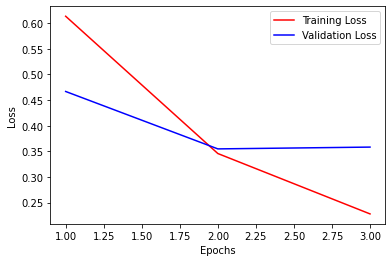

In [19]:
plot_training(trained_model1, 3)

In [20]:
# Input for variable-length sequences of integers
inputs = keras.Input(shape=(None,), dtype="int32")
# Embed each integer in a 128-dimensional vector
x = keras.layers.Embedding(max_features, 128)(inputs)
# Add 2 bidirectional LSTMs
x = keras.layers.Bidirectional(keras.layers.LSTM(64, return_sequences=True))(x)
x = keras.layers.Bidirectional(keras.layers.LSTM(64))(x)
# Add a classifier
outputs = keras.layers.Dense(1, activation="sigmoid")(x)
model2 = keras.Model(inputs, outputs)
model2.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, None)]            0         
_________________________________________________________________
embedding_2 (Embedding)      (None, None, 128)         2560000   
_________________________________________________________________
bidirectional (Bidirectional (None, None, 128)         98816     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               98816     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 2,757,761
Trainable params: 2,757,761
Non-trainable params: 0
_________________________________________________________________


In [23]:
trained_model2 = train_model(model2, 3)

Epoch 1/3
98/98 [==============================] - 306s 3s/step - loss: 0.2414 - accuracy: 0.9069 - val_loss: 0.3046 - val_accuracy: 0.8714
Epoch 2/3
98/98 [==============================] - 335s 3s/step - loss: 0.1895 - accuracy: 0.9306 - val_loss: 0.3221 - val_accuracy: 0.8660
Epoch 3/3
98/98 [==============================] - 325s 3s/step - loss: 0.1634 - accuracy: 0.9416 - val_loss: 0.3704 - val_accuracy: 0.8630


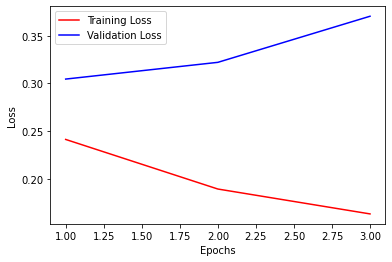

In [25]:
plot_training(trained_model2, 3)